# Machine Learning Pipeline - Model Training

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline.

We will discuss:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. **Model Training**
5. Obtaining Predictions / Scoring

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso, LinearRegression

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables
X_train = pd.read_csv('xtrain_unscaled.csv')
X_test = pd.read_csv('xtest_unscaled.csv')

In [3]:
# drop the rank feature as it is unneeded by the model
X_train = X_train.drop('rank',axis=1)

In [4]:
# load the target
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

In [5]:
# load the pre-selected features
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

# display the final feature set
features 

['fueltype_gas',
 'aspiration_turbo',
 'country',
 'carbody',
 'drivewheel',
 'cylindernumber',
 'fuelsystem',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']

In [6]:
# reduce the train and test set to the selected features
X_train = X_train[features]
X_test = X_test[features]

# Feature Scaling

In [7]:
scaled = [var for var in X_train.columns if X_train[var].nunique() > 2]
scaled

['country',
 'carbody',
 'drivewheel',
 'cylindernumber',
 'fuelsystem',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']

In [8]:
X_train[scaled].describe()

,country,carbody,drivewheel,cylindernumber,fuelsystem,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.783217,4.167832,2.356643,5.615385,5.685315,3.713287,98.998601,174.504895,65.882517,53.818881,2578.181818,127.832168,3.341888,104.013986,25.020979,30.440559
std,1.606062,1.054741,0.549079,0.903226,1.391218,1.253853,6.258976,12.052101,2.064090,2.525753,528.853951,42.208568,0.265537,38.091067,6.004070,6.387292
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.680000,52.000000,13.000000,16.000000
25%,5.000000,4.000000,2.000000,6.000000,5.000000,3.000000,94.500000,167.050000,64.100000,52.000000,2190.500000,97.500000,3.150000,73.000000,20.000000,25.000000
50%,7.000000,4.000000,2.000000,6.000000,6.000000,3.000000,96.900000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.330000,95.000000,24.000000,30.000000
75%,7.000000,5.000000,3.000000,6.000000,7.000000,4.500000,102.400000,184.600000,66.900000,55.600000,2975.500000,145.500000,3.590000,116.000000,30.000000,34.000000
max,7.000000,5.000000,3.000000,6.000000,7.000000,6.000000,120.900000,208.100000,71.700000,59.800000,4066.000000,326.000000,3.800000,262.000000,38.000000,47.000000


In [9]:
# load the scaler object
scaler = MinMaxScaler()

# fit the train set
scaler.fit(X_train[scaled])

# transform the train and test set
X_train[scaled] = scaler.transform(X_train[scaled])
X_test[scaled] = scaler.transform(X_test[scaled])

In [10]:
# display the scaled dataset
X_train[scaled].head()

,country,carbody,drivewheel,cylindernumber,fuelsystem,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,1.0,1.00,0.5,1.0,0.333333,0.4,0.288630,0.485039,0.070707,0.525000,0.246106,0.156250,0.419643,0.161905,0.56,0.548387
1,1.0,1.00,0.5,1.0,0.666667,0.4,0.355685,0.522835,0.474747,0.641667,0.263017,0.203125,0.633929,0.152381,0.52,0.516129
2,1.0,0.75,1.0,0.2,0.166667,1.0,0.253644,0.384252,0.393939,0.150000,0.249666,0.000000,0.580357,0.233333,0.16,0.225806
3,1.0,1.00,0.5,0.8,1.000000,0.4,0.402332,0.584252,0.474747,0.608333,0.567868,0.433594,0.669643,0.476190,0.16,0.193548
4,1.0,1.00,0.5,1.0,0.666667,0.6,0.282799,0.437795,0.363636,0.316667,0.260792,0.203125,0.598214,0.171429,0.48,0.516129


Let's confirm our scaling operation:

In [11]:
X_train[scaled].describe().round(2)

,country,carbody,drivewheel,cylindernumber,fuelsystem,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.80,0.79,0.68,0.92,0.78,0.54,0.36,0.47,0.41,0.50,0.34,0.23,0.59,0.25,0.48,0.47
std,0.27,0.26,0.27,0.18,0.23,0.25,0.18,0.19,0.21,0.21,0.24,0.16,0.24,0.18,0.24,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.67,0.75,0.50,1.00,0.67,0.40,0.23,0.35,0.23,0.35,0.17,0.11,0.42,0.10,0.28,0.29
50%,1.00,0.75,0.50,1.00,0.83,0.40,0.30,0.45,0.36,0.52,0.26,0.20,0.58,0.20,0.44,0.45
75%,1.00,1.00,1.00,1.00,1.00,0.70,0.46,0.63,0.52,0.65,0.51,0.29,0.81,0.30,0.68,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Our scaled variables now range between 0 and 1.

# Model Training: Lasso Regression

In [12]:
# instantiate the model object
las_model = Lasso(alpha=0.001, random_state=0)

# fit the model
las_model.fit(X_train,y_train)

Lasso(alpha=0.001, random_state=0)

In [13]:
# make predictions on the train set
las_pred = las_model.predict(X_train)

# evaluate the model
print(f'train mse: {int(mean_squared_error(y_train,las_pred))}')
print(f'train rmse: {(int(mean_squared_error(y_train,las_pred)))**0.5}')
print(f'train r2: {r2_score(y_train,las_pred)}')
print()

train mse: 8677741
train rmse: 2945.800570303428
train r2: 0.8609628063344303



In [14]:
# make predictions on the test set
las_pred = las_model.predict(X_test)

# evaluate the model
print(f'test mse: {int(mean_squared_error(y_test,las_pred))}')
print(f'test rmse: {(int(mean_squared_error(y_test,las_pred)))**0.5}')
print(f'test r2: {r2_score(y_test,las_pred)}')
print()

test mse: 12777008
test rmse: 3574.4940900776432
test r2: 0.8065185143336999



# Model Training: Linear Regression

In [15]:
# instantiate the model object
lin_model = LinearRegression()

# fit the model
lin_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# make predictions on the train set
lin_pred = lin_model.predict(X_train)

# evaluate the model
print(f'train mse: {int(mean_squared_error(y_train,lin_pred))}')
print(f'train rmse: {(int(mean_squared_error(y_train,lin_pred)))**0.5}')
print(f'train r2: {r2_score(y_train,lin_pred)}')
print()

train mse: 8677741
train rmse: 2945.800570303428
train r2: 0.8609628063934068



In [17]:
# make predictions on the test set
lin_pred = lin_model.predict(X_test)

# evaluate the model
print(f'test mse: {int(mean_squared_error(y_test,lin_pred))}')
print(f'test rmse: {(int(mean_squared_error(y_test,lin_pred)))**0.5}')
print(f'test r2: {r2_score(y_test,lin_pred)}')
print()

test mse: 12777192
test rmse: 3574.5198278929715
test r2: 0.8065157293524736



Text(0, 0.5, 'Predicted Values')

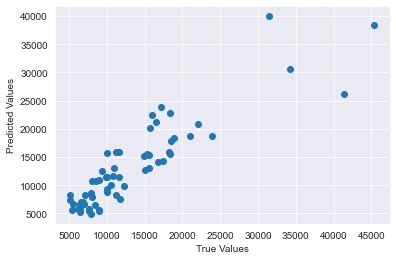

In [18]:
# y_test vs lasso regression predictions
plt.scatter(y_test,las_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

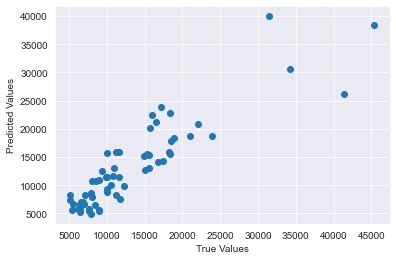

In [19]:
# y_test vs linear regression predictions
plt.scatter(y_test,lin_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

Notice the estimates for the highest values (>30,000) seem out of place with their true values. Recall that our target had a lot of extreme outliers on the right tail of the distribution. As such, thr model had insufficient to learn from. The predictions below 30k, however, are just fine.

In the next notebook, we re-run our feature engineering with in-house classes and open source libraries.